In [2]:
from lib.analysis import *

reader = MultiReader(Path("./measurements/1йМугнитяпогрушностьПервогоПереключения/"))
packages = reader.parse()

first_positive_digital_steps = []

for pack in packages:
    for step in pack.steps:
        if step.digital == 1:
            first_positive_digital_steps.append(step)
            break

# Усреднение

In [98]:
from lib.analysis import *
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

reader = MultiReader(Path("./measurements/1stMagnet/"))
packages = reader.parse()

positions = dict()

precision = 1000
name = "otdal"

for i, pack in enumerate(packages):
    if name in pack.name:
        print(pack.name)
        for step in pack.steps:
            key = str(round(step.pos * precision) / precision)
            if not key in positions:
                positions[key] = []
            positions[key].append(step.digital)

for key in positions:
    positions[key] = np.average(positions[key])

positions

1_1_otdal
1_2_otdal
1_3_otdal


{'3.727': 1.0,
 '3.728': 1.0,
 '3.741': 1.0,
 '3.742': 1.0,
 '3.743': 1.0,
 '3.744': 1.0,
 '3.757': 1.0,
 '3.758': 1.0,
 '3.759': 1.0,
 '3.76': 1.0,
 '3.773': 1.0,
 '3.774': 1.0,
 '3.775': 1.0,
 '3.776': 1.0,
 '3.789': 1.0,
 '3.79': 1.0,
 '3.791': 1.0,
 '3.792': 1.0,
 '3.805': 1.0,
 '3.806': 1.0,
 '3.807': 1.0,
 '3.808': 1.0,
 '3.821': 1.0,
 '3.822': 1.0,
 '3.823': 1.0,
 '3.824': 1.0,
 '3.825': 1.0,
 '3.837': 1.0,
 '3.838': 1.0,
 '3.839': 1.0,
 '3.84': 1.0,
 '3.853': 1.0,
 '3.854': 1.0,
 '3.855': 1.0,
 '3.856': 1.0,
 '3.869': 1.0,
 '3.87': 1.0,
 '3.871': 1.0,
 '3.872': 1.0,
 '3.885': 1.0,
 '3.886': 1.0,
 '3.887': 1.0,
 '3.888': 1.0,
 '3.901': 1.0,
 '3.902': 1.0,
 '3.903': 1.0,
 '3.904': 1.0,
 '3.917': 1.0,
 '3.918': 1.0,
 '3.919': 1.0,
 '3.92': 1.0,
 '3.933': 1.0,
 '3.934': 1.0,
 '3.935': 1.0,
 '3.936': 1.0,
 '3.949': 1.0,
 '3.95': 1.0,
 '3.951': 1.0,
 '3.952': 1.0,
 '3.965': 1.0,
 '3.966': 1.0,
 '3.967': 1.0,
 '3.968': 1.0,
 '3.981': 1.0,
 '3.982': 1.0,
 '3.983': 1.0,
 '3.984': 1.0,
 

['3.392', '3.393', '3.394', '3.395', '3.396', '3.397', '3.398', '3.399', '3.4', '3.401', '3.402', '3.403', '3.404', '3.405', '3.406', '3.407', '3.408', '3.409', '3.41', '3.411', '3.412', '3.413', '3.414', '3.415', '3.416', '3.417', '3.418', '3.419', '3.42', '3.421', '3.422', '3.423', '3.424', '3.425', '3.426', '3.427', '3.428', '3.429', '3.43', '3.431', '3.432', '3.433', '3.434', '3.435', '3.436', '3.437', '3.438', '3.439', '3.44', '3.441', '3.442', '3.443', '3.444', '3.445', '3.446', '3.447', '3.448', '3.449', '3.45', '3.451', '3.452', '3.453', '3.454', '3.455', '3.456', '3.457', '3.458', '3.459', '3.46', '3.461', '3.462', '3.463', '3.464', '3.465', '3.466', '3.467', '3.468', '3.469', '3.47', '3.471', '3.472', '3.473', '3.474', '3.475', '3.476', '3.477', '3.478', '3.479', '3.48', '3.481', '3.482', '3.483', '3.484', '3.485', '3.486', '3.487', '3.488', '3.489', '3.49', '3.498', '3.499', '3.5', '3.501', '3.502', '3.503', '3.504', '3.505', '3.506', '3.507', '3.508', '3.51', '3.512', '3.51

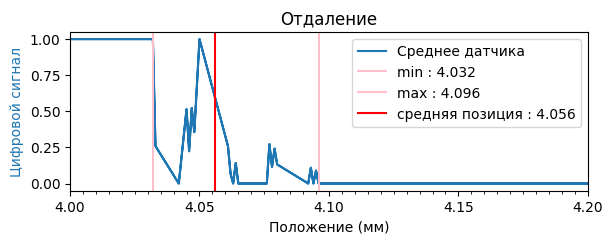

In [103]:
fig, ax1 = plt.subplots()
# График положения
ax1.set_xlabel("Положение (мм)")
ax1.set_ylabel("Цифровой сигнал", color="tab:blue")

ax1.tick_params(axis="y")
ax1.set_xlim([4, 4.2])

space = 0.1
ax1.xaxis.set_major_locator(ticker.MultipleLocator(0.05))
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(0.005))

x_values = []
y_values = []
keys = sorted(positions.keys(), key=lambda x: float(x))
print(keys)

min_x_key = None
max_y_key = None

prev_pos = 0
for key in keys:
    pos = float(key)
    x_values.append(pos)
    value = positions[key]
    y_values.append(value)

    if min_x_key is None and value < 1:
        min_x_key = prev_pos

    prev_pos = pos

prev_pos = 0
for key in reversed(keys):
    pos = float(key)
    x_values.append(pos)
    value = positions[key]
    y_values.append(value)
    
    if max_y_key is None and value > 0:
        max_y_key = prev_pos

    prev_pos = pos

gap_poses = []
gap_weights = []

for key in keys:
    pos = float(key)
    if pos > min_x_key and pos < max_y_key:
        value = positions[str(key)]
        gap_poses.append(pos)
        gap_weights.append(value)

average_pos = np.average(gap_poses, weights=gap_weights)

ax1.plot(x_values, y_values, label="Среднее датчика", color="tab:blue")

ax1.axvline(min_x_key, color='pink', linestyle='-', linewidth=1.5, label=f'min : {min_x_key:.3f}')
ax1.axvline(max_y_key, color='pink', linestyle='-', linewidth=1.5, label=f'max : {max_y_key:.3f}')
ax1.axvline(average_pos, color='red', linestyle='-', linewidth=1.5, label=f'средняя позиция : {average_pos:.3f}')
# ax1.axvline(mean_x, color='red', linestyle='-', linewidth=3, label=f'Среднее позиции: {mean_x:.2f}')

# Показываем график
fig.tight_layout(pad=2)

fig.set_figheight(2)

ax1.legend()
name_map = {
    "otdal": "Отдаление",
    "pribl": "Приближение"
}
plt.title(name_map[name])

save_file = reader.dir / "digital_graphs"
save_file.mkdir(exist_ok=True)
save_file = save_file/f"{reader.dir.stem}.png"
plt.savefig(save_file, bbox_inches='tight')

In [ ]:
fig, ax1 = plt.subplots()

def get_cmap(n, name='hsv'):
    return plt.colormaps.get_cmap(name)(n)

# График положения
ax1.set_xlabel("Положение (мм)")
ax1.set_ylabel("Цифровой сигнал", color="tab:blue")

ax1.tick_params(axis="y")
ax1.set_xlim([3, 5])

space = 0.25
ax1.xaxis.set_major_locator(ticker.MultipleLocator(space))

# Вторая ось для аналогового значения
# ax2 = ax1.twinx()
# ax2.set_ylabel("Аналоговый сигнал", color="tab:red")
# ax2.plot(time, analog_value, label="Аналоговый сигнал", color="tab:red", linestyle="dashed")
# ax2.tick_params(axis="y", labelcolor="tab:red")

# Показываем график
fig.tight_layout(pad=2)

fig.set_figheight(2)

plt.title(pack.name)

save_file = reader.dir / "digital_graphs"
save_file.mkdir(exist_ok=True)
save_file = save_file/f"{reader.dir.stem}.png"
plt.savefig(save_file, bbox_inches='tight')

for i, pack in enumerate(packages):
    if "pribl" in pack.name:
        pack.plot(ax1, "pos", "digital", pack.name, "tab:red")